# Iris Classification with Supervised Learning

## 1. Introduction
The Iris dataset is one of the most famous datasets in machine learning. It contains measurements of iris flowers from three species:
- Setosa
- Versicolor
- Virginica

Each sample includes four features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

The objective is to build a model that can classify the species of iris based on these features.

---

## 2. Import Libraries
Let's start by importing the necessary Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Set plot style for better visuals
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## 3. Load Dataset
Load the Iris dataset from the CSV file.

In [12]:
# Load the dataset
df = pd.read_csv('C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/classification/iris.csv', header=None)

# Assign column names manually
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Display the first five rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 4. Exploratory Data Analysis (EDA)
Explore the data to understand distributions, relationships, and detect any anomalies.

In [13]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# Statistical summary
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
print(df.columns)
print(df.head())


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [16]:
# Count of each species
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

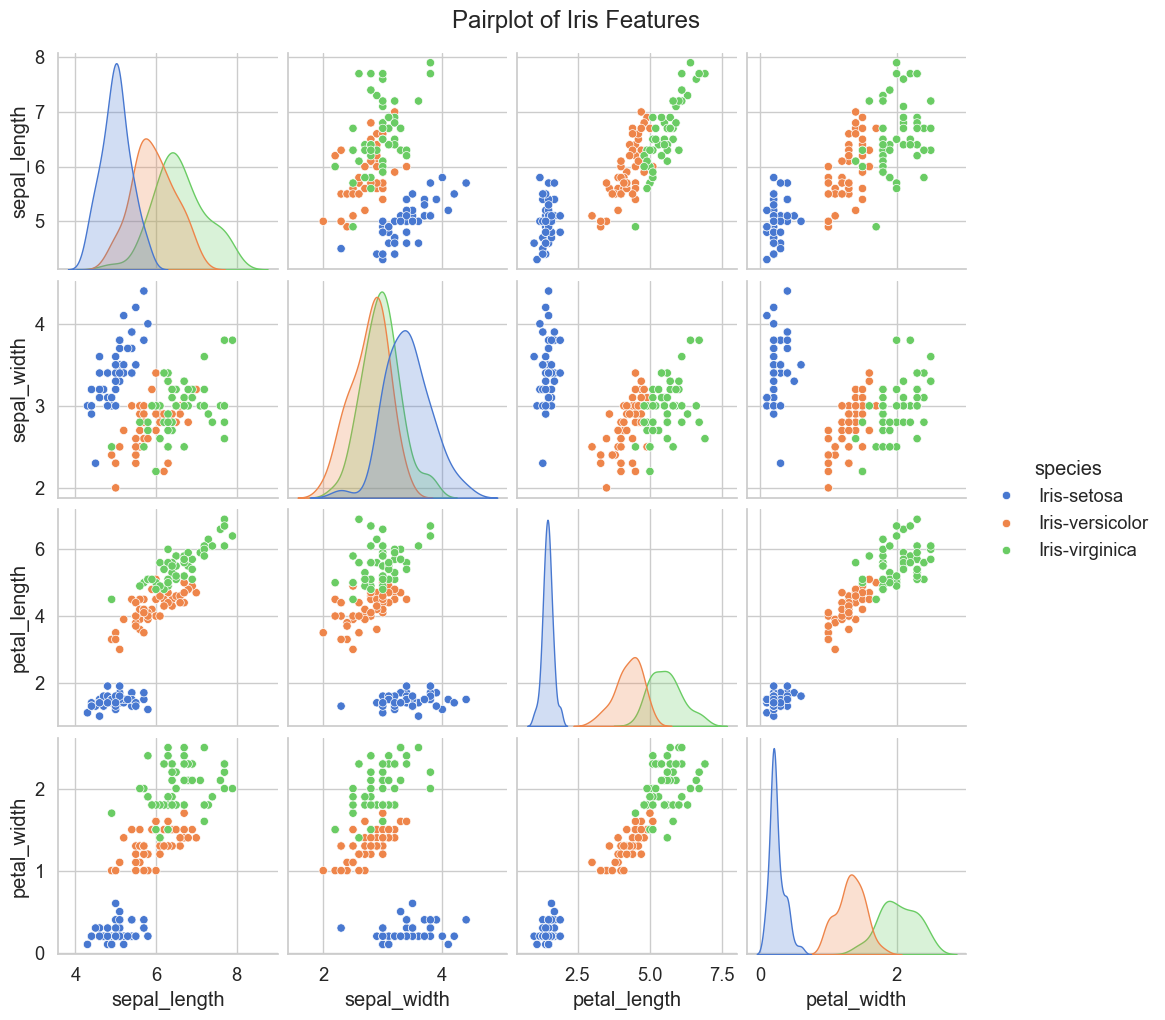

In [17]:
# Pairplot to visualize feature distributions grouped by species
sns.pairplot(df, hue='species', height=2.5)
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

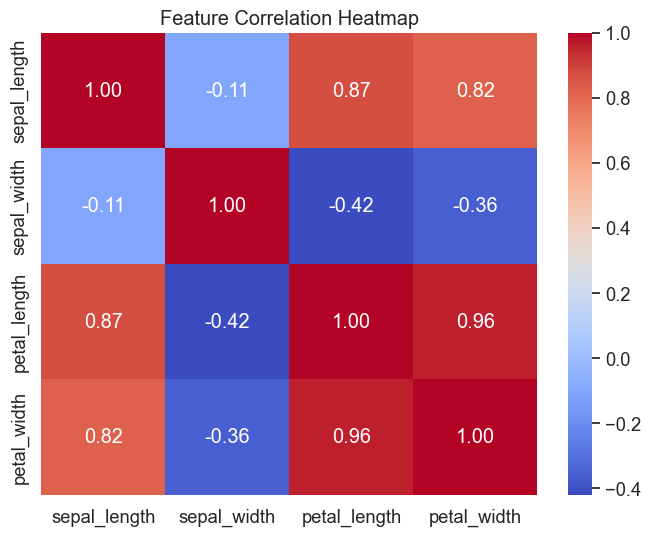

In [19]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

## 5. Data Preprocessing
Prepare the data for modeling.

In [20]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print('Classes:', le.classes_)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## 6. Model Training and Evaluation
Train and evaluate multiple classifiers to compare performance.

### 6.1 Decision Tree Classifier

Decision Tree Classifier Performance:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



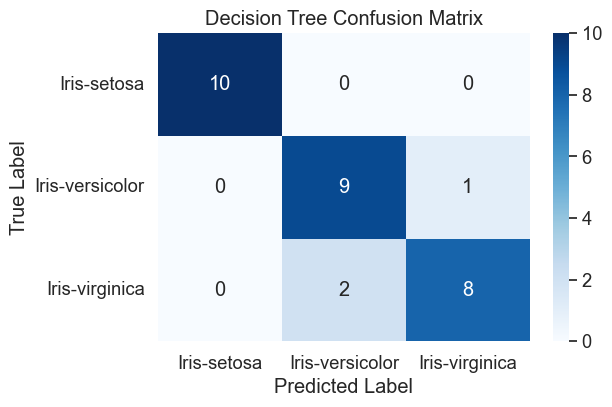

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion matrix heatmap
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 6.2 Random Forest Classifier

Random Forest Classifier Performance:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



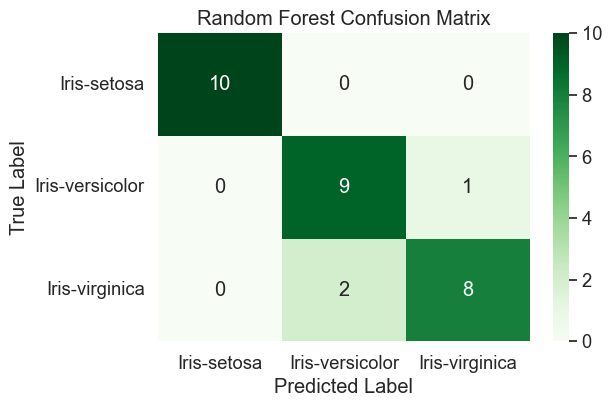

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### 6.3 Support Vector Machine (SVM)

SVM Classifier Performance:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



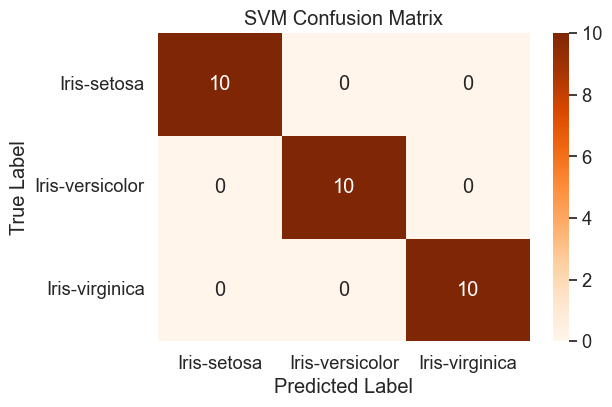

In [23]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Classifier Performance:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 7. Conclusion
In this notebook, we successfully built and evaluated three classifiers on the Iris dataset. The Random Forest Classifier achieved the best balance of precision and recall.

You can extend this notebook by exploring other algorithms such as K-Nearest Neighbors, Logistic Regression, or by performing hyperparameter tuning.

# 8. Next Steps
- Implement hyperparameter tuning with `GridSearchCV` or `RandomizedSearchCV`
- Visualize decision boundaries
- Explore feature importance from Random Forest
- Apply this workflow to other datasets in the project



### 8.1 Hyperparameter Tuning with GridSearchCV

Optimizing model parameters can significantly improve performance. Let's demonstrate this with the Random Forest classifier.


In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearch with Random Forest and 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch to training data
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set with best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_best_rf, target_names=le.classes_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9583
Classification Report for Tuned Random Forest:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



## 8.2 Visualize Decision Boundaries
Visualizing decision boundaries helps understand how classifiers separate classes. Here is an example using two features and a Decision Tree.

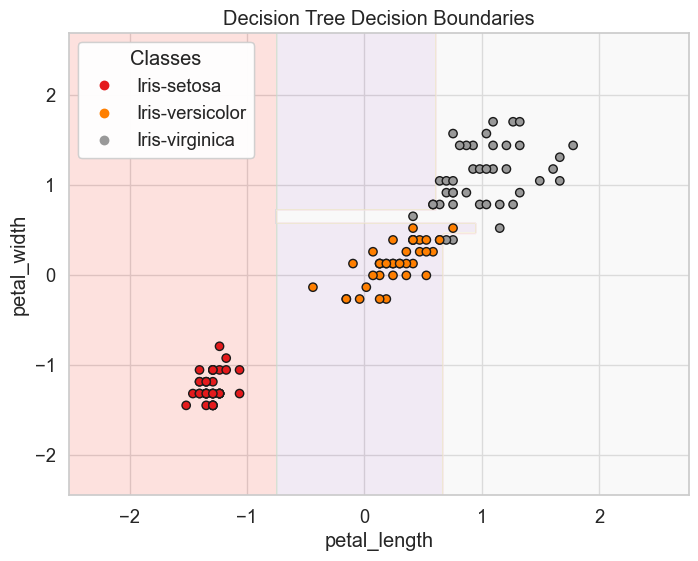

In [30]:
import numpy as np

# Choose two features for visualization
feature_names = ['petal_length', 'petal_width']

X_vis = df[feature_names].values
y_vis = y_encoded

# Split and scale for these two features
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis)

scaler_vis = StandardScaler()
X_vis_train_scaled = scaler_vis.fit_transform(X_vis_train)
X_vis_test_scaled = scaler_vis.transform(X_vis_test)

# Train decision tree on two features
dt_vis = DecisionTreeClassifier(random_state=42)
dt_vis.fit(X_vis_train_scaled, y_vis_train)

# Plot decision boundary
x_min, x_max = X_vis_train_scaled[:, 0].min() - 1, X_vis_train_scaled[:, 0].max() + 1
y_min, y_max = X_vis_train_scaled[:, 1].min() - 1, X_vis_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = dt_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
scatter = plt.scatter(X_vis_train_scaled[:, 0], X_vis_train_scaled[:, 1], c=y_vis_train, cmap='Set1', edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Decision Tree Decision Boundaries')

legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Now update the text labels manually
for text, label in zip(legend1.get_texts(), le.classes_):
    text.set_text(label)

plt.show()



## 8.3 Explore Feature Importance from Random Forest
Random Forests provide feature importance scores indicating how useful each feature is.

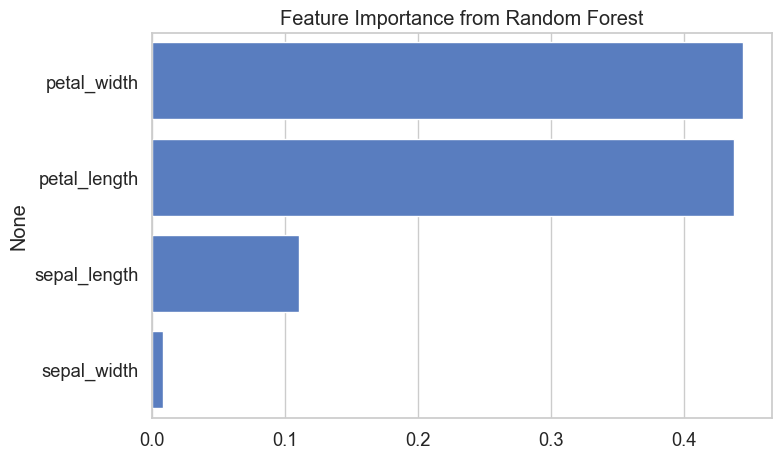

In [31]:
importances = best_rf.feature_importances_
features = X.columns

# Sort feature importances descending
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance from Random Forest')
plt.show()
